In [7]:
cd /content/drive/MyDrive/Data Storage

/content/drive/MyDrive/Data Storage


In [8]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

url_head = '/content/drive/My Drive/WPI Test/'

def wpi(name):
  df = pd.read_excel(url_head + name + '.xlsx').iloc[31:35].T.reset_index() # 데이터 전처리후 인덱스 초기화
  df = df.drop(columns=['index', 32, 33]).drop(18).iloc[13:] # 떨어져나온 인덱스 삭제후 자기평가, 타인평가 인덱스 행 삭제
  df = df.reset_index().drop(columns = 'index') # 일렬로 출력

  persnal = df[:5]
  values = df[5:]

  plt.plot(persnal[31], persnal[34], 'ro', color = 'blue')  # 자기평가 그래프
  plt.ylabel('persnality')
  print(plt.show())

  plt.plot(values[31], values[34], color = 'red')     # 타인평가 그래프
  plt.ylabel('values')
  print(plt.show())

  persnal.columns = ['persnality', 'p_value']      # 자기평가, 타인평가 나눈뒤 컬럼명 설정
  values.columns = ['values', 'v_value']

  df = pd.concat([persnal, values.reset_index().drop(columns = 'index')], axis= 1) # 행을 맞춰야해서 타인평가 인덱스 초기화, 인덱스열 삭제
  return df

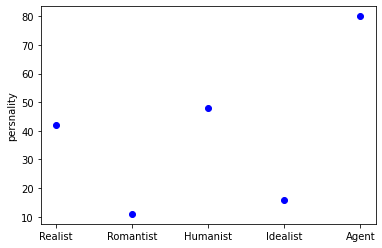

None


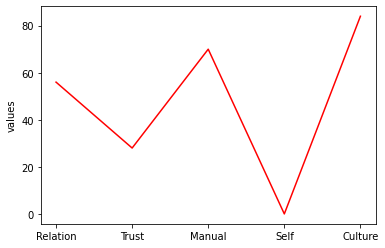

None


,persnality,p_value,values,v_value
0,Realist,42,Relation,56
1,Romantist,11,Trust,28
2,Humanist,48,Manual,70
3,Idealist,16,Self,0
4,Agent,80,Culture,84


In [ ]:
wpi('아빠')

In [25]:
df = pd.read_csv('/content/drive/MyDrive/Data Storage/wpi.csv')
df

,Sex,Age,Realist,Romantist,Humanist,Idealist,Agent,Relation,Trust,Manual,Self,Culture
0,1,19,28,33,48,64,48,42,42,28,48,56
1,1,26,42,55,64,96,80,14,42,42,98,84
2,1,29,56,0,16,32,64,42,14,42,28,56
3,1,17,56,55,32,0,0,42,28,56,0,0
4,1,28,56,44,48,64,80,70,56,56,0,84
...,...,...,...,...,...,...,...,...,...,...,...,...
79,2,23,70,77,80,64,16,56,28,56,14,42
80,2,27,70,66,64,64,32,0,0,0,0,0
81,2,22,42,77,80,96,48,70,70,98,56,56
82,2,32,56,66,48,48,32,70,56,42,42,28


In [76]:
df['group_age'] = (df['Age'] * 0.1).apply(int) * 10   # 연령대별 컬럼 추가

In [143]:
grouping = df.groupby(['group_age', 'Sex']).mean().reset_index()   # 연령대별 평균 데이터
grouping

,group_age,Sex,Age,Realist,Romantist,Humanist,Idealist,Agent,Relation,Trust,Manual,Self,Culture
0,10,1,17.600000,44.800000,50.600000,51.200000,44.800000,28.800000,39.200000,28.000000,33.600000,29.200000,22.400000
1,10,2,19.000000,28.000000,33.000000,80.000000,64.000000,64.000000,28.000000,0.000000,56.000000,14.000000,28.000000
2,20,1,24.394737,48.631579,45.736842,53.263158,50.947368,47.157895,47.526316,40.157895,46.052632,30.578947,43.842105
3,20,2,23.833333,49.777778,51.333333,58.666667,47.111111,39.111111,35.000000,29.555556,47.444444,24.888889,28.000000
4,30,1,33.400000,33.600000,36.300000,48.000000,54.400000,56.000000,40.600000,28.000000,43.400000,36.400000,46.200000
5,30,2,32.000000,42.000000,51.333333,37.333333,37.333333,37.333333,56.000000,51.333333,23.333333,32.666667,28.000000
6,40,1,44.000000,46.666667,22.000000,64.000000,64.000000,69.333333,42.000000,28.000000,51.333333,37.333333,46.666667
7,40,2,44.333333,46.666667,47.666667,42.666667,37.333333,58.666667,60.666667,56.000000,56.000000,32.666667,65.333333
8,50,1,51.000000,28.000000,16.500000,56.000000,48.000000,64.000000,49.000000,28.000000,70.000000,35.000000,77.000000
9,60,1,64.000000,28.000000,55.000000,0.000000,32.000000,16.000000,14.000000,42.000000,14.000000,0.000000,14.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


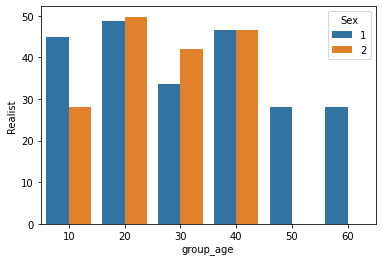

In [145]:
sns.barplot('group_age', 'Realist', hue= 'Sex',data= grouping)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


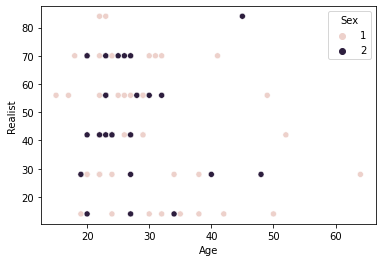

In [113]:
sns.scatterplot('Age', 'Realist', hue= 'Sex', data= df)

In [136]:
group_sex = df.groupby('Sex').mean()
group_sex = group_sex.iloc[:, 1:len(group_sex)-3]
group_sex = group_sex.reset_index()

In [135]:
sns.barplot(
    data= group_sex,
    x= ''
)

,Realist,Romantist,Humanist,Idealist,Agent,Relation,Trust,Manual,Self,Culture
Sex,,,,,,,,,,
1,44.610169,42.508475,51.932203,51.254237,48.271186,44.847458,36.067797,45.084746,31.423729,43.186441
2,47.600000,50.160000,55.040000,45.440000,42.240000,40.320000,34.160000,45.920000,26.320000,32.480000
